In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 1,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([-0.08699846, -0.08564895, -0.08592695, -0.08634382, -0.08679795,
       -0.08728403, -0.08780378, -0.0883593 , -0.0889532 , -0.08958817,
       -0.09026688, -0.09099257, -0.09176815, -0.09259725, -0.09348339,
       -0.09443063, -0.09544307, -0.09652513, -0.09768158, -0.09891766,
       -0.10023862, -0.10165018, -0.10315853, -0.10477018, -0.10649228,
       -0.10833204, -0.11029744, -0.11239684, -0.1146391 , -0.11703384,
       -0.11959106, -0.12232155, -0.12523651, -0.12834799, -0.13166851,
       -0.13521147, -0.13899118, -0.14302218, -0.14732033, -0.15190184,
       -0.1567837 , -0.16198361, -0.16752017, -0.17341238, -0.17967987,
       -0.18634254, -0.19342071, -0.20093477, -0.20890528, -0.21735206,
       -0.22629449, -0.23575097, -0.24573812, -0.256271  , -0.26736164,
       -0.27901921, -0.29124856, -0.30405   , -0.31741825, -0.33134142,
       -0.3458004 , -0.36076787, -0.37620783, -0.39207509, -0.40831459,
       -0.42486191, -0.44164345, -0.45857722, -0.4755742 , -0.49

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.24970829e-01],
       [  2.00000000e+01,   5.02165854e-01],
       [  3.00000000e+01,   5.21976292e-01],
       [  4.00000000e+01,   5.39231241e-01],
       [  5.00000000e+01,   4.54001993e-01],
       [  6.00000000e+01,   4.74606544e-01],
       [  7.00000000e+01,   5.14866590e-01],
       [  8.00000000e+01,   4.63114232e-01],
       [  9.00000000e+01,   4.46319312e-01],
       [  1.00000000e+02,   5.51044106e-01],
       [  1.10000000e+02,   5.19893050e-01],
       [  1.20000000e+02,   5.52232981e-01],
       [  1.30000000e+02,   5.63150644e-01],
       [  1.40000000e+02,   5.12652874e-01],
       [  1.50000000e+02,   4.43862528e-01],
       [  1.60000000e+02,   4.54757333e-01],
       [  1.70000000e+02,   4.07229066e-01],
       [  1.80000000e+02,   2.94437885e-01],
       [  1.90000000e+02,   1.74438298e-01],
       [  2.00000000e+02,   1.17227241e-01],
       [  2.10000000e+02,   9.28259119e-02],
       [  2.20000000e+02,   8.57229009e-02],
       [  

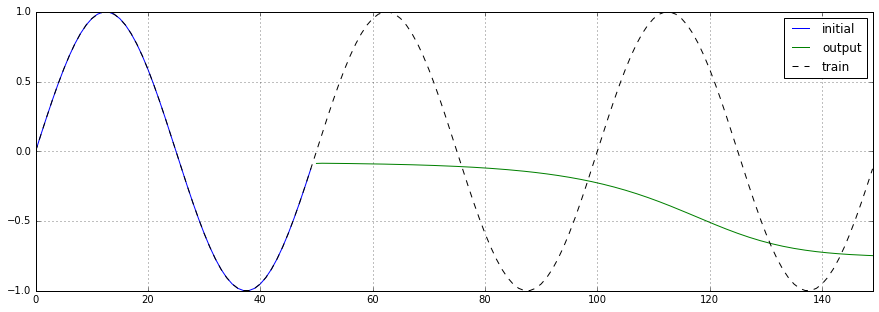

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

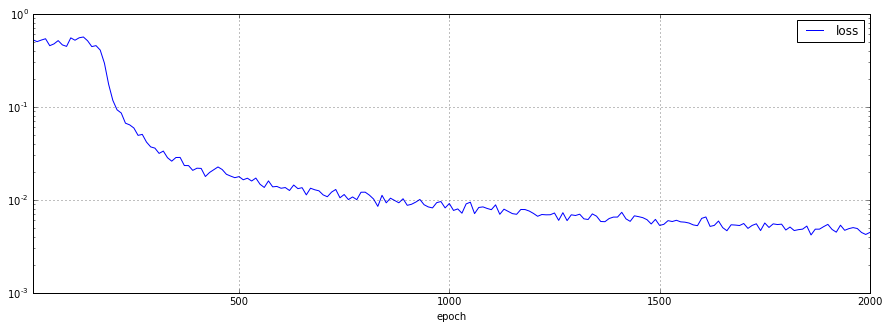

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")